# Introduction to CSV, Excel, and JSON Files

## 1. CSV Files

- > **CSV (Comma-Separated Values) files are simple text files used to store tabular data. Each line in a CSV file corresponds to a row in the table, and each value is separated by a comma.**
   - >> **Simplicity:** Easy to create and read using basic text editors.
   - >> **Compatibility:** Widely supported by various applications, including spreadsheet programs and databases.
   - >> **Portability:** Lightweight and portable across different systems.
   


       

In [2]:
# Hoe to read a csv file 

import pandas as pd 

pd.read_csv(r"file_path")

# Encoders in CSV Files
### What is an Encoder?
   > **An encoder in the context of CSV files refers to the method used to convert characters into a specific format that can be stored in a file. This process is known as character encoding. Different encodings handle characters in different ways, which is essential for correctly storing and retrieving text data from a file, especially when dealing with different languages and special characters.**
### Why Use Encoders?
   - > **Compatibility**: Ensure that text is correctly displayed across different systems and applications.
   - > **Data Integrity**: Prevent data corruption when reading and writing files with special characters.
   - > **Localization**: Support multiple languages in text data, allowing applications to handle global data.**

# Common Character Encodings:
- **UTF-8:** The most commonly used encoding format on the web, supporting all Unicode characters. It is efficient and backward compatible with ASCII.
- **ASCII:** An older encoding format that supports only English characters and some control characters.
- **ISO-8859-1 (Latin-1)**: Supports Western European languages.
- **UTF-16:** Supports all Unicode characters but uses more space compared to UTF-8.

# Encoding

In [2]:
encoding = [
    "ASCII",
    "UTF-8",
    "UTF-16",
    "UTF-32",
    "ISO-8859-1",
    "Windows-1252",
    "UTF-7",
    "UTF-EBCDIC",
    "UTF-16LE",
    "UTF-16BE",
    "UTF-32LE",
    "UTF-32BE",
    "ISO-8859-2",
    "ISO-8859-3",
    "ISO-8859-4",
    "ISO-8859-5",
    "ISO-8859-6",
    "ISO-8859-7",
    "ISO-8859-8",
    "ISO-8859-9",
    "ISO-8859-10",
    "ISO-8859-11",
    "ISO-8859-13",
    "ISO-8859-14",
    "ISO-8859-15",
    "ISO-8859-16",
    "KOI8-R",
    "KOI8-U",
    "GB2312",
    "GBK",
    "Shift_JIS",
    "EUC-JP"
]

In [4]:
import pandas as pd

# Read the CSV file with UTF-8 encoding
df = pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\Multi_language_file_encoding_tester.txt", encoding='ASCII')
print(df)


UnicodeDecodeError: 'ascii' codec can't decode byte 0xe5 in position 66: ordinal not in range(128)

In [3]:
import pandas as pd

# Read the CSV file with UTF-8 encoding
df = pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\Multi_language_file_encoding_tester.txt", encoding='utf-8')
print(df)


   Name   Age              Description
0  John    28      "Engineer from USA"
1  Anna    24          "学生 from Japan"
2    张伟    30   "Developer from China"


# to get the correct encoders we can use the following code

In [15]:
for e in encoding:
    try:
        pd.read_csv(r"C:\Users\THINKPAD\Downloads\df_2.csv",encoding = e)
        print(f"correct encoder  {e}")
    except UnicodeDecodeError:
        print(f"Different encoder not this {e}")
    except UnicodeError:
        print(f"Different encoder not this {e}")
    except LookupError:
        print(f"Different encoder not this {e}")

correct encoder  ASCII
correct encoder  UTF-8
Different encoder not this UTF-16
Different encoder not this UTF-32
correct encoder  ISO-8859-1
correct encoder  Windows-1252
Different encoder not this UTF-7
Different encoder not this UTF-EBCDIC
correct encoder  UTF-16LE
correct encoder  UTF-16BE
Different encoder not this UTF-32LE
Different encoder not this UTF-32BE
correct encoder  ISO-8859-2
correct encoder  ISO-8859-3
correct encoder  ISO-8859-4
correct encoder  ISO-8859-5
correct encoder  ISO-8859-6
correct encoder  ISO-8859-7
correct encoder  ISO-8859-8
correct encoder  ISO-8859-9
correct encoder  ISO-8859-10
correct encoder  ISO-8859-11
correct encoder  ISO-8859-13
correct encoder  ISO-8859-14
correct encoder  ISO-8859-15
correct encoder  ISO-8859-16
correct encoder  KOI8-R
correct encoder  KOI8-U
correct encoder  GB2312
correct encoder  GBK
correct encoder  Shift_JIS
correct encoder  EUC-JP


# parse_error

# What is a Parse Error?
  > **A parse error occurs when a program, such as pandas, encounters issues while reading or interpreting the structure of a CSV file. This can happen due to various reasons, including format inconsistencies, missing values, unexpected delimiters, and more.**

### common Causes of Parse Errors:
- **Inconsistent Delimiters:**
       > The CSV file might have different delimiters in different rows.
       > Example: Some rows use commas while others use semicolons.
       
### Mismatched Columns:
    > Different rows might have a different number of columns.
    > Example: The header row has 5 columns, but some data rows have 6 or 4 columns.
    
### Unquoted Fields:
     > Fields containing the delimiter character are not properly quoted.
     > Example: A field value contains a comma but is not enclosed in quotes.
     
### Improperly Escaped Characters:
     > Special characters, like quotes within a quoted field, are not properly escaped.
     > Example: Using a single quote inside a double-quoted field without escaping it.
     
###  Missing or Extra Quotation Marks:
     > Fields are inconsistently quoted or have missing/extra quotation marks.
     > Example: A field starts with a quote but doesn’t end with one.
### Blank Lines:
     > Blank lines in the CSV file might cause the parser to misinterpret the file structure.

In [19]:
pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\Parse_error.csv")

ParserError: Error tokenizing data. C error: Expected 4 fields in line 3, saw 6


In [21]:
# using skip will skip the bad lines 
pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\Parse_error.csv",header=None , on_bad_lines="skip")

,0,1,2,3
0,1,2,3,4
1,2,3,4,5


In [22]:
# using warn will skip the bad lines and also warn what was skipped 
pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\Parse_error.csv",header=None , on_bad_lines="warn")

Skipping line 3: expected 4 fields, saw 6



,0,1,2,3
0,1,2,3,4
1,2,3,4,5


In [ ]:
pd.read_csv('file.csv', quoting=csv.QUOTE_ALL) # Control the field quoting behavior.

pd.read_csv('file.csv', skip_blank_lines=True) # Skip blank lines in the file.

# Converter 

# What is a Converter?
  > **In pandas, a converter is a function that you can apply to a specific column while reading a CSV file. The converter function is used to transform the data in that column as it is being read into a DataFrame. This is particularly useful for preprocessing data on the fly, handling custom data formats, or applying specific transformations that are not covered by the standard options in pandas.**

### Why Use Converters?
   > Converters are useful in various scenarios, including:
   - > **Custom Data Parsing**: When the data in a column is in a custom format that pandas does not natively support.
   - > **Data Cleaning**: To clean or preprocess data directly while reading it into a DataFrame.
   - > **Type Conversion:** To convert data types that require special handling (e.g., converting a string representation of a date to a datetime object).
   - > **Handling Special Characters:** To strip or replace special characters from the data.
   
 
# pd.read_csv(filepath_or_buffer, converters={column_name: function})


In [23]:
pd.read_csv(r"C:\Users\THINKPAD\Downloads\df_2.csv")

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Payment_method,UPI type,Debit type,Credit type,Rating
0,1,('1003433','P00180042','MALE','18','12','1','0','11','1753','Cash','','','','4.5')
1,2,('1001211','P00143642','m','23','4','1','0','1','4226','Credit Card','','','SBI Classic Credit Card','2.7')
2,5,('1001285','P00042842','mALE','44','4','0','1','5','8620','Credit Card','','','Others','4.5')
3,6,('1004083','P00205042','m','57','14','0','0','5','5328','Cash','','','','2.5')
4,7,('1003695','P00127442','MALE','33','2','2','0','1','19139','Credit Card','','','HDFC Bank Super Premium Credit Card','3.5')
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44783,90615,('1000752','P00021642','Female','27','3','3','0','8','7837','UPI','Google Pay','','','3.4')
44784,90616,('1005127','P00032042','male','46','5','0','1','1','11787','Debit Card','','Visa','','4.4')
44785,90618,('1004780','P00061142','Male','35','12','3','0','8','7888','UPI','Paytm','','','3.6')
44786,90620,('1001303','P00235842','M','31','19','4+','0','11','4706','UPI','PhonePe','','','4.1')


In [24]:
# Want to convert all the values in the gender column to capital case  when readind a csv file oonly 
# - for this we need to to use any function eithe user defined or in-built 
# - we are not going to call the function converters will call the function and we need to give in the form of dictionary 
def upper(x):
    return x.upper()

pd.read_csv(r"C:\Users\THINKPAD\Downloads\df_2.csv",converters = {"Gender":upper})

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Payment_method,UPI type,Debit type,Credit type,Rating
0,1,('1003433','P00180042','MALE','18','12','1','0','11','1753','Cash','','','','4.5')
1,2,('1001211','P00143642','M','23','4','1','0','1','4226','Credit Card','','','SBI Classic Credit Card','2.7')
2,5,('1001285','P00042842','MALE','44','4','0','1','5','8620','Credit Card','','','Others','4.5')
3,6,('1004083','P00205042','M','57','14','0','0','5','5328','Cash','','','','2.5')
4,7,('1003695','P00127442','MALE','33','2','2','0','1','19139','Credit Card','','','HDFC Bank Super Premium Credit Card','3.5')
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44783,90615,('1000752','P00021642','FEMALE','27','3','3','0','8','7837','UPI','Google Pay','','','3.4')
44784,90616,('1005127','P00032042','MALE','46','5','0','1','1','11787','Debit Card','','Visa','','4.4')
44785,90618,('1004780','P00061142','MALE','35','12','3','0','8','7888','UPI','Paytm','','','3.6')
44786,90620,('1001303','P00235842','M','31','19','4+','0','11','4706','UPI','PhonePe','','','4.1')


# Chunk_size

# What is chunksize?
   > **The chunksize parameter in the pandas read_csv function allows you to read a large CSV file in smaller, more manageable chunks instead of loading the entire file into memory at once. This is particularly useful when working with very large datasets that might not fit into memory.**

### Why Use chunksize?
   - > **Memory Efficiency:** By processing data in chunks, you avoid loading the entire dataset into memory, which can prevent memory overflow errors.
   - > **Performance:** Reading and processing data in chunks can be faster for large datasets because it reduces memory usage and allows for more efficient use of system resources.
   - > **Scalability:** Allows handling of large datasets that would otherwise be impossible to process on machines with limited memory.

In [ ]:
# - It will create an iterator object (like a generator )

In [29]:
data_chunk = pd.read_csv(r"C:\Users\THINKPAD\Downloads\df_2.csv",chunksize=2000)
for chunk in data_chunk:
    print(chunk.shape)
    print(chunk.info())

(2000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  2000 non-null   int64 
 1   User_ID                     2000 non-null   object
 2   Product_ID                  2000 non-null   object
 3   Gender                      2000 non-null   object
 4   Age                         2000 non-null   object
 5   Occupation                  2000 non-null   object
 6   Stay_In_Current_City_Years  2000 non-null   object
 7   Marital_Status              2000 non-null   object
 8   Product_Category            2000 non-null   object
 9   Purchase                    2000 non-null   object
 10  Payment_method              2000 non-null   object
 11  UPI type                    2000 non-null   object
 12  Debit type                  2000 non-null   object
 13  Credit type                 2000 non-

(2000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 24000 to 25999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  2000 non-null   int64 
 1   User_ID                     2000 non-null   object
 2   Product_ID                  2000 non-null   object
 3   Gender                      2000 non-null   object
 4   Age                         2000 non-null   object
 5   Occupation                  2000 non-null   object
 6   Stay_In_Current_City_Years  2000 non-null   object
 7   Marital_Status              2000 non-null   object
 8   Product_Category            2000 non-null   object
 9   Purchase                    2000 non-null   object
 10  Payment_method              2000 non-null   object
 11  UPI type                    2000 non-null   object
 12  Debit type                  2000 non-null   object
 13  Credit type                 2000

# Excel

## Key Differences Between CSV and Excel:

### File Structure:
  - > **CSV:** Simple, plain text format with no additional structure or metadata.
  - > **Excel:** Complex format with support for multiple sheets, cell formatting, formulas, and other features.
  
### Data Storage:
  - > **CSV**: Stores only raw data as text.
  - > **Excel**: Stores data with formatting, formulas, and additional metadata.

### File Size:
  - > **CSV**: Generally smaller in size due to its plain text nature.
  - > **Excel:** Larger due to additional features and binary/XML structure.

### Support for Complex Data:
  - > **CSV**: Limited to flat, tabular data.
  - > **Excel**: Supports hierarchical data, complex calculations, and visualizations
  
  
### Formulas are evaluated and the results (the output of the formulas) are imported, not the formulas themselves.
### Formatting (like cell color, font style, etc.) is not preserved.


In [30]:
# - Difference b/w Excel and csv will be csv will have only one sheet in it where as Excel can have more than one sheet 

pd.read_excel(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\Diff_Excel_csv.xlsx") # By default t will give you thhe first sheet 

#  We can use the sheet_name parameter to load different sheets 
# but when we are loading different sheets at a time  it will be given in a list at that time it will going to create a dictionary 

,1,2
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
5,1,2
6,1,2
7,1,2


# Why Use read_excel in pandas?
- **While read_csv is sufficient for handling plain text data in CSV files, read_excel is necessary for working with the richer, more complex data structures found in Excel files.**

### read_excel allows you to:
- Read specific sheets from an Excel file.
- Preserve cell formatting and other metadata if needed.
- Handle multiple sheets within a single file.
- Work with data stored in a variety of formats supported by Excel.

In [32]:
# We can read a specific sheet By specifying the sheet_name 
pd.read_excel(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\Diff_Excel_csv.xlsx",sheet_name=1)

,1,2,22
0,1,2,22
1,1,2,22
2,1,2,22
3,1,2,22
4,1,2,22
5,1,2,22
6,1,2,22
7,1,2,22


In [35]:
excel = pd.read_excel(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\Diff_Excel_csv.xlsx",sheet_name=[0,1])

In [36]:
excel

{0:    1  2
 0  1  2
 1  1  2
 2  1  2
 3  1  2
 4  1  2
 5  1  2
 6  1  2
 7  1  2,
 1:    1   2   22
 0   1   2  22
 1   1   2  22
 2   1   2  22
 3   1   2  22
 4   1   2  22
 5   1   2  22
 6   1   2  22
 7   1   2  22}

In [37]:
excel[0]

,1,2
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
5,1,2
6,1,2
7,1,2


In [38]:
excel[1]

,1,2,22
0,1,2,22
1,1,2,22
2,1,2,22
3,1,2,22
4,1,2,22
5,1,2,22
6,1,2,22
7,1,2,22


### Reading Multiple Sheets:
- You can read multiple sheets into a dictionary of DataFrames.

In [5]:
import pandas as pd

# Read all sheets into a dictionary of DataFrames
dfs = pd.read_excel(r'C:\Users\THINKPAD\OneDrive\Desktop\Ml\Diff_Excel_csv.xlsx', sheet_name=None)

# Display the first few rows of each DataFrame
for sheet_name, df in dfs.items():
    print(f"Sheet name: {sheet_name}")
    print(df.head())


Sheet name: Sheet1
   1  2
0  1  2
1  1  2
2  1  2
3  1  2
4  1  2
Sheet name: Sheet2
   1   2   22
0   1   2  22
1   1   2  22
2   1   2  22
3   1   2  22
4   1   2  22


In [6]:
dfs.items()

dict_items([('Sheet1',    1  2
0  1  2
1  1  2
2  1  2
3  1  2
4  1  2
5  1  2
6  1  2
7  1  2), ('Sheet2',    1   2   22
0   1   2  22
1   1   2  22
2   1   2  22
3   1   2  22
4   1   2  22
5   1   2  22
6   1   2  22
7   1   2  22)])

# Saving Excel sheets

# Excelwriter

- ExcelWriter in pandas is used to write DataFrames to Excel files with flexibility.
- Multiple Sheets: Allows writing multiple DataFrames to different sheets in the same file.
- Custom Formatting: Supports applying custom formatting to the output Excel file, especially with the xlsxwriter engine.
- Engine Options: You can specify different engines like xlsxwriter or openpyxl for writing Excel files.
- Appending Data: You can append data to an existing Excel file using the mode='a' option.
- By using ExcelWriter, you can create complex Excel reports and ensure your data is organized and formatted according to your needs.

In [39]:
# Saving multiple excel sheets into 1 Excel work book 
# We need to use a different method now that is Excelwriter 
# it is like file handling concept when we use Excelwriter it will open a excel file then ofter we need to close the file 


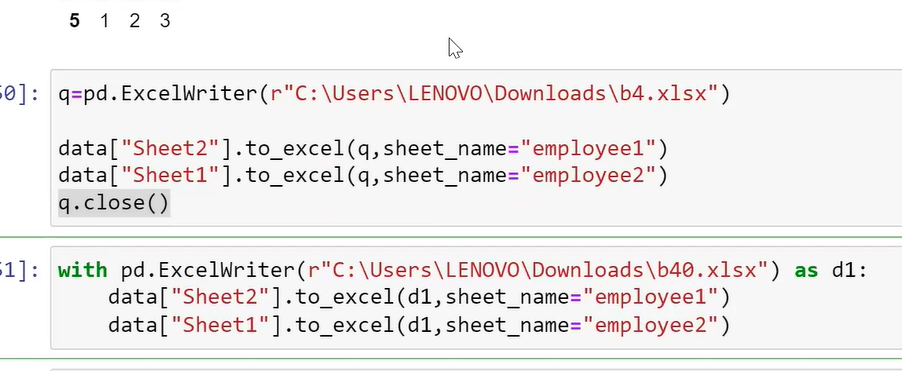

In [41]:
a = pd.ExcelWriter(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\ExcelWriter_example.xlsx") # we created a file 

excel[0].to_excel(a,sheet_name="Sheet_1") # data from the excel we are saving in the above file using the sheet_1 as a name 

excel[1].to_excel(a,sheet_name="Sheet_2")# data from the excel we are saving in the above file using the sheet_2 as a name 

a.close() # it is mandatory to close the  file

In [42]:
# Everytime we are manually closing the file instead  we can use the with keyword to close the file 
with pd.ExcelWriter(r"C:\Users\THINKPAD\OneDrive\Desktop\Ml\ExcelWriter_example1.xlsx") as d1:
    excel[0].to_excel(d1,sheet_name="Sheet_1")
    excel[1].to_excel(d1,sheet_name="Sheet_2")

# Json

- **JSON (JavaScript Object Notation) is a lightweight data interchange format that is easy for humans to read and write, and easy for machines to parse and generate. JSON is text-based and is used to represent structured data based on JavaScript object syntax. It is language-independent and widely used for data exchange between clients and servers in web applications.**

#### Basic Structure of JSON
- A JSON file is composed of key/value pairs, arrays, and nested structures. The primary elements in JSON are:
- **Object:** An unordered collection of key/value pairs enclosed in curly braces {}.
- **Array:** An ordered list of values enclosed in square brackets [].
- **Key/Value Pair:** A key (string) followed by a colon : and a value. The value can be a string, number, object, array, true, false, or null.

In [43]:
{"name":["bhanu"],"rol_no":[33],"phn":[9963]} # Dictionary 


{'name': ['bhanu'], 'rol_no': [33], 'phn': [9963]}

In [ ]:
'{"name":["bhanu"],"rol_no":[33],"phn":[9963]}' # Json

In [44]:
# to work with the json file to read we use the following 
# method when we are passing we need to pass in a single quate 

pd.read_json('{"name":["bhanu"],"rol_no":[33],"phn":[9963]}')

,name,rol_no,phn
0,bhanu,33,9963


In [46]:
pd.read_json({"name":["bhanu"],"rol_no":[33],"phn":[9963]})
# when we are passing without the single quate then that time also we will get an error 

ValueError: Invalid file path or buffer object type: <class 'dict'>

In [45]:
pd.read_json('{"name":"bhanu","rol_no":33,"phn":9963}') 
# By using this code we will get an error for that
#reason only we will pass the values in the form of lists

ValueError: If using all scalar values, you must pass an index

In [49]:
data = pd.DataFrame([[1,2],[3,4]],index = ["r1","r2"],columns = ["c1","c2"])

In [51]:
data.to_json()

'{"c1":{"r1":1,"r2":3},"c2":{"r1":2,"r2":4}}'

- **Json have lot of structures we can manuplate the structure using the orient parameter in the to_json**

In [52]:
data.to_json(orient="columns") 
# now the columns will act as keys and for nested dictionary the rows will act as keys

'{"c1":{"r1":1,"r2":3},"c2":{"r1":2,"r2":4}}'

In [56]:
pd.read_json('{"c1":{"r1":1,"r2":3},"c2":{"r1":2,"r2":4}}')

,c1,c2
r1,1,2
r2,3,4


In [54]:
data.to_json(orient="index")
# now index acting as a keys and for nested dictionary columns acting as indexes 

'{"r1":{"c1":1,"c2":2},"r2":{"c1":3,"c2":4}}'

In [58]:
pd.read_json('{"r1":{"c1":1,"c2":2},"r2":{"c1":3,"c2":4}}')

# By default it will take outer most keys as columns this time we are making information wrong 
# so for that reason only we need to change the orient in this also 

,r1,r2
c1,1,3
c2,2,4


In [59]:
pd.read_json('{"r1":{"c1":1,"c2":2},"r2":{"c1":3,"c2":4}}',orient = "index")

,c1,c2
r1,1,2
r2,3,4


In [61]:
data.to_json(orient="split")

'{"columns":["c1","c2"],"index":["r1","r2"],"data":[[1,2],[3,4]]}'

In [62]:
pd.read_json('{"columns":["c1","c2"],"index":["r1","r2"],"data":[[1,2],[3,4]]}')

,columns,index,data
0,c1,r1,"[1, 2]"
1,c2,r2,"[3, 4]"


In [63]:
pd.read_json('{"columns":["c1","c2"],"index":["r1","r2"],"data":[[1,2],[3,4]]}',orient="split")

,c1,c2
r1,1,2
r2,3,4


In [64]:
data.to_json(orient='records')

'[{"c1":1,"c2":2},{"c1":3,"c2":4}]'

In [65]:
pd.read_json('[{"c1":1,"c2":2},{"c1":3,"c2":4}]') 

,c1,c2
0,1,2
1,3,4


# Read_json will not able to handle the advanced json structure 



In [67]:
pd.read_json('{"name":"p1","height":153,"Weight":{"in g":42,"in kg":56}}')

,name,height,Weight
in g,p1,153,42
in kg,p1,153,56


In [68]:
pd.read_json('{"name":"p1","height":153,"Weight":{"in g":[42],"in kg":[56]}}')

,name,height,Weight
in g,p1,153,[42]
in kg,p1,153,[56]


In [69]:
pd.read_json('{"name":"p1","height":153,"Weight":[{"in g":[42],"in kg":[56]}]}')

,name,height,Weight
0,p1,153,"{'in g': [42], 'in kg': [56]}"


# pd.json_normalize()

- **json_normalize is a function in the pandas library used to convert semi-structured JSON data into a flat table or DataFrame. JSON data often contains nested structures, such as lists of dictionaries or dictionaries of dictionaries. json_normalize helps in flattening these complex JSON structures, making it easier to analyze and manipulate the data using pandas.**

### Why Use json_normalize?
- **Flatten Nested Structures:** Converts nested JSON data into a flat tabular format.
- **Ease of Analysis:** Simplifies the process of loading and analyzing JSON data in pandas.
- **Data Manipulation:** Makes it easier to perform data manipulation and transformation operations on JSON data.

In [72]:
pd.json_normalize({"name":"p1","height":153,"Weight":{"in g":42,"in kg":56}})

,name,height,Weight.in g,Weight.in kg
0,p1,153,42,56


In [73]:
{"name":"p1","height":153,"weight":{"in g":42,"in kg":56}}

{'name': 'p1', 'height': 153, 'weight': {'in g': 42, 'in kg': 56}}

In [74]:
pd.read_json('{"name":"p1","height":153,"weight":{"in g":42,"in kg":56}}')

,name,height,weight
in g,p1,153,42
in kg,p1,153,56


In [75]:
pd.json_normalize({"name":"p1","height":153,"weight":{"in g":42,"in kg":56}})

,name,height,weight.in g,weight.in kg
0,p1,153,42,56


# Max_level 

In [76]:
pd.json_normalize({"name":"p1","height":153,"weight":{"in g":42,"in kg":56}},max_level=0)

,name,height,weight
0,p1,153,"{'in g': 42, 'in kg': 56}"


In [77]:
pd.json_normalize({"name":"p1","height":153,"weight":{"in g":42,"in kg":56}},max_level=1)

,name,height,weight.in g,weight.in kg
0,p1,153,42,56


# record_path

In [81]:
pd.json_normalize({"name":"p1","height":153,"weight":[{"in g":42,"in kg":56}]},record_path="weight")

,in g,in kg
0,42,56


# meta

In [82]:
pd.json_normalize({"name":"p1","height":153,"weight":[{"in g":42,"in kg":56}]},record_path="weight",meta=['height','name'])

,in g,in kg,height,name
0,42,56,153,p1
